In [1]:
import pandas
import numpy as np
from pandas import read_csv
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]
data = read_csv(url, names = names)

In [2]:
veri = data.values
X = veri[:, 0:8]
Y = veri[:, 8]

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [4]:
#MAKİNE ÖĞRENMESİ ALGORİTMALARINDA SINIFLANDIRMA MODELLERİ
# 1- LOJİSTİK REGRESYON

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver= "lbfgs", max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

In [6]:
from sklearn.metrics import accuracy_score
print("Eğitim Verisi İçin Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
print("Test Verisi İçin Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))

Eğitim Verisi İçin Doğruluk Oranı:  0.7653631284916201
Test Verisi İçin Doğruluk Oranı  :  0.7792207792207793


In [7]:
#Veriyi normalize edicez.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [8]:
#Normalize edilmiş veri seti için modelleme
model1 = LogisticRegression(solver= "lbfgs", max_iter = 1000)
model1.fit(x_train_std, y_train)

y_pred = model1.predict(x_test_std)
y_pred1 = model1.predict(x_train_std)
print("Eğitim Verisi İçin Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
print("Test Verisi İçin Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))

Eğitim Verisi İçin Doğruluk Oranı:  0.7635009310986964
Test Verisi İçin Doğruluk Oranı  :  0.7792207792207793


In [9]:
# Performansı arttırmak için parametreler değiştirilir.
# C PARAMETRESİ (Düzenlileştirme katsayısı - lambda) (En iyi C değeri deneyerek veya basit bir döngü yardımı ile bulunur.)
model1 = LogisticRegression(solver= "lbfgs", max_iter = 1000, C=0.0001)
model1.fit(x_train_std, y_train)

y_pred = model1.predict(x_test_std)
y_pred1 = model1.predict(x_train_std)
print("Eğitim Verisi İçin Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
print("Test Verisi İçin Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))

Eğitim Verisi İçin Doğruluk Oranı:  0.638733705772812
Test Verisi İçin Doğruluk Oranı  :  0.6796536796536796


In [10]:
for aa in [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 1000, 10000]:
    model1 = LogisticRegression(solver= "lbfgs", C=aa)
    model1.fit(x_train_std, y_train)
    y_pred = model1.predict(x_test_std)
    y_pred1 = model1.predict(x_train_std)
    print("Parametre = ", aa,  "\n")
    print("Eğitim Verisi İçin Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
    print("Test Verisi İçin Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))
    print("\n")

Parametre =  0.001 

Eğitim Verisi İçin Doğruluk Oranı:  0.6368715083798883
Test Verisi İçin Doğruluk Oranı  :  0.6796536796536796


Parametre =  0.01 

Eğitim Verisi İçin Doğruluk Oranı:  0.7523277467411545
Test Verisi İçin Doğruluk Oranı  :  0.7748917748917749


Parametre =  0.05 

Eğitim Verisi İçin Doğruluk Oranı:  0.7616387337057728
Test Verisi İçin Doğruluk Oranı  :  0.7835497835497836


Parametre =  0.1 

Eğitim Verisi İçin Doğruluk Oranı:  0.7653631284916201
Test Verisi İçin Doğruluk Oranı  :  0.7835497835497836


Parametre =  0.5 

Eğitim Verisi İçin Doğruluk Oranı:  0.7653631284916201
Test Verisi İçin Doğruluk Oranı  :  0.7792207792207793


Parametre =  1 

Eğitim Verisi İçin Doğruluk Oranı:  0.7635009310986964
Test Verisi İçin Doğruluk Oranı  :  0.7792207792207793


Parametre =  5 

Eğitim Verisi İçin Doğruluk Oranı:  0.7653631284916201
Test Verisi İçin Doğruluk Oranı  :  0.7792207792207793


Parametre =  10 

Eğitim Verisi İçin Doğruluk Oranı:  0.7653631284916201
Test Veris

In [11]:
#MAKİNE ÖĞRENMESİ ALGORİTMALARINDA SINIFLANDIRMA MODELLERİ
#2- K-En Yakın Komşu Algoritması (k-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred1 = knn.predict(x_train)
print("Eğitim Verisi İçin Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
print("Test Verisi İçin Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))



Eğitim Verisi İçin Doğruluk Oranı:  0.7895716945996276
Test Verisi İçin Doğruluk Oranı  :  0.7489177489177489


In [12]:
import time
for a in range(1,11):
    tic = time.time()
    knn = KNeighborsClassifier(n_neighbors = a)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    y_pred1 = knn.predict(x_train)
    print("k = ", a)
    print("Eğitim Verisi İçin Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
    print("Test Verisi İçin Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))
    toc = time.time()
    print(toc-tic, "sn. geçti\n")
    print("\n")
    
    

k =  1
Eğitim Verisi İçin Doğruluk Oranı:  1.0
Test Verisi İçin Doğruluk Oranı  :  0.6147186147186147
0.056966543197631836 sn. geçti



k =  2
Eğitim Verisi İçin Doğruluk Oranı:  0.8417132216014898
Test Verisi İçin Doğruluk Oranı  :  0.7142857142857143
0.05696821212768555 sn. geçti



k =  3
Eğitim Verisi İçin Doğruluk Oranı:  0.8603351955307262
Test Verisi İçin Doğruluk Oranı  :  0.6926406926406926
0.05596327781677246 sn. geçti



k =  4
Eğitim Verisi İçin Doğruluk Oranı:  0.7951582867783985
Test Verisi İçin Doğruluk Oranı  :  0.7359307359307359
0.05496788024902344 sn. geçti



k =  5
Eğitim Verisi İçin Doğruluk Oranı:  0.7895716945996276
Test Verisi İçin Doğruluk Oranı  :  0.7489177489177489
0.06196188926696777 sn. geçti



k =  6
Eğitim Verisi İçin Doğruluk Oranı:  0.7858472998137802
Test Verisi İçin Doğruluk Oranı  :  0.7402597402597403
0.05696463584899902 sn. geçti



k =  7
Eğitim Verisi İçin Doğruluk Oranı:  0.770949720670391
Test Verisi İçin Doğruluk Oranı  :  0.748917748917748

TypeError: 'str' object is not callable

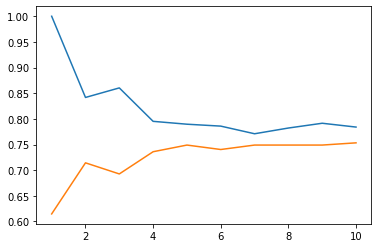

In [29]:
import matplotlib.pyplot as plt
egitim_accuracy = []
test_accuracy = []
komsu_sayisi = range(1,11)
for a in komsu_sayisi:
    clf = KNeighborsClassifier(n_neighbors = a)
    clf.fit(x_train, y_train)
    egitim_accuracy.append((clf.score(x_train, y_train)))
    test_accuracy.append((clf.score(x_test, y_test)))
    
plt.plot(komsu_sayisi, egitim_accuracy, label="Eğitim Verisi Doğruluk Oranı")
plt.plot(komsu_sayisi, test_accuracy, label="Test Verisi Doğruluk Oranı")
plt.ylabel("Doğruluk")
plt.xlabel("Komşu Sayısı")
plt.legend()

In [14]:
#Çapraz doğrulama
from sklearn.model_selection import cross_val_score
cv_scores = []

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

scores = cross_val_score(knn, x_train, y_train, cv = 10, scoring = "accuracy")
print("Skorlar      : ", scores, "\n")
print("Ortalama Skor: ",scores.mean())

Skorlar      :  [0.74545455 0.72727273 0.72727273 0.66666667 0.67924528 0.71698113
 0.60377358 0.60377358 0.81132075 0.75471698] 

Ortalama Skor:  0.7036477987421383


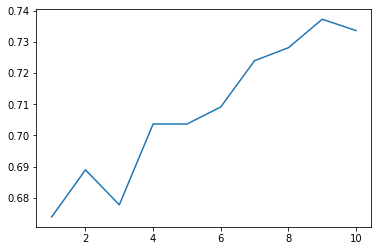

In [21]:
#Çapraz doğrulama ile parametre optimizasyonunun birlikte kullanımı
k_range = range(1,11)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train, cv = 10, scoring = "accuracy")
    k_scores.append(scores.mean())
    
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel = ("KNN için Komşu Değerleri(k)")
plt.ylabel = ("CV ile Elde Edilen Doğruluk Oranları")
plt.show()
#Sonraki aşamada, Bulunan en iyi K değeri için modelin test performansı ölçülecek.


In [31]:
# 3- NAIVE BAYES (koşullu olasılık)
#Bu algoritmada da verinin normalize-standardize(std) edilmesi önerilir.
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_std, y_train)

y_pred = nb.predict(x_test_std)
y_pred1 = nb.predict(x_train_std)

print("Eğitim Verisi için Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
print("\n")
print("Test Verisi için Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))

Eğitim Verisi için Doğruluk Oranı:  0.7672253258845437


Test Verisi için Doğruluk Oranı  :  0.7619047619047619


In [35]:
# 4- SUPPORT VECTOR MACHINE
# Örneklem uzayında bir ayırma düzlemi yardımıyla sınıflandırma yapar. (Doğrusal, Doğrusal olmayan ayırma)
#Bu algoritmada da verinin normalize-standardize(std) edilmesi önerilir.
from sklearn.svm import SVC
clf = SVC(kernel = "linear", C = 1) 
# Kernel: ayırma düzlemi , C : kontrol parametresi (farklı değerler verilerek modelin performansı arttırılıp azaltılabilir.)
clf.fit(x_train_std, y_train)
y_pred = clf.predict(x_test_std)
y_pred1 = clf.predict(x_train_std)
print("Eğitim Verisi için Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
print("\n")
print("Test Verisi için Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))

Eğitim Verisi için Doğruluk Oranı:  0.770949720670391


Test Verisi için Doğruluk Oranı  :  0.7835497835497836


In [37]:
clf = SVC(kernel = "rbf", gamma = 0.7) #Doğrusal olmayan düzlem, gamma değerini değiştirerek modelin performansı arttırılıp azaltılabilir.
clf.fit(x_train_std, y_train)
y_pred = clf.predict(x_test_std)
y_pred1 = clf.predict(x_train_std)
print("Eğitim Verisi için Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
print("\n")
print("Test Verisi için Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))

Eğitim Verisi için Doğruluk Oranı:  0.8789571694599627


Test Verisi için Doğruluk Oranı  :  0.7662337662337663


In [38]:
for aa in [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    clf = SVC(kernel = "rbf", gamma = aa)
    clf.fit(x_train_std, y_train)
    y_pred = clf.predict(x_test_std)
    y_pred1 = clf.predict(x_train_std)
    
    print("gamma = ", aa, "\n")
    print("Eğitim Verisi için Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
    print("Test Verisi için Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))
    print("\n")


gamma =  0.001 

Eğitim Verisi için Doğruluk Oranı:  0.6405959031657356
Test Verisi için Doğruluk Oranı  :  0.683982683982684


gamma =  0.01 

Eğitim Verisi için Doğruluk Oranı:  0.7672253258845437
Test Verisi için Doğruluk Oranı  :  0.7835497835497836


gamma =  0.05 

Eğitim Verisi için Doğruluk Oranı:  0.7951582867783985
Test Verisi için Doğruluk Oranı  :  0.7792207792207793


gamma =  0.1 

Eğitim Verisi için Doğruluk Oranı:  0.8212290502793296
Test Verisi için Doğruluk Oranı  :  0.7705627705627706


gamma =  0.5 

Eğitim Verisi için Doğruluk Oranı:  0.9180633147113594
Test Verisi için Doğruluk Oranı  :  0.7619047619047619


gamma =  1 

Eğitim Verisi için Doğruluk Oranı:  0.962756052141527
Test Verisi için Doğruluk Oranı  :  0.7359307359307359


gamma =  5 

Eğitim Verisi için Doğruluk Oranı:  1.0
Test Verisi için Doğruluk Oranı  :  0.6796536796536796


gamma =  10 

Eğitim Verisi için Doğruluk Oranı:  1.0
Test Verisi için Doğruluk Oranı  :  0.6796536796536796


gamma =  100 

Eğ

In [39]:
# 5- KARAR AĞACI
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 4)
dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)
pred1 = dtc.predict(x_train)

print("Eğitim Verisi için Doğruluk Oranı: ", accuracy_score(pred1, y_train))
print("\n")
print("Test Verisi için Doğruluk Oranı: ", accuracy_score(pred, y_test))

Eğitim Verisi için Doğruluk Oranı:  0.7951582867783985


Test Verisi için Doğruluk Oranı:  0.7532467532467533


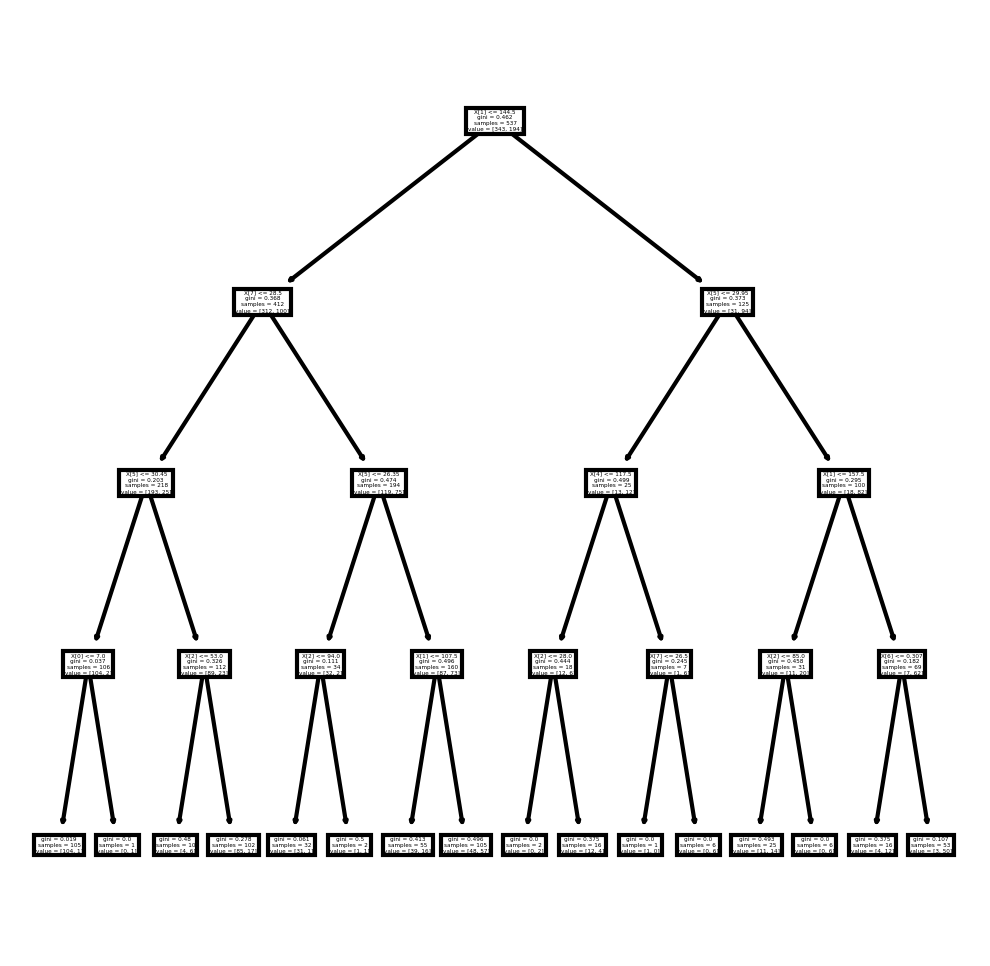

In [40]:
#Görselleştirme
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(dtc);

In [44]:
# 6- YAPAY SİNİR AĞLARI (MULTİLAYER PERCEPTRON)
#Bu algoritmada da verinin normalize-standardize(std) edilmesi önerilir.

from sklearn.neural_network import MLPClassifier

# activation fonksiyonunun alabileceği değerler : {"logistic", "tanh", "relu"} 
mlp = MLPClassifier(activation = "logistic", hidden_layer_sizes = [3,5], solver = "lbfgs", max_iter = 20000, tol = 0.000000001)
mlp.fit(x_train_std, y_train)
pred = mlp.predict(x_test_std)
pred1 = mlp.predict(x_train_std)

print("Eğitim Verisi için Doğruluk Oranı: ", accuracy_score(pred1, y_train))
print("\n")
print("Test Verisi için Doğruluk Oranı: ", accuracy_score(pred, y_test))

Eğitim Verisi için Doğruluk Oranı:  0.813780260707635


Test Verisi için Doğruluk Oranı:  0.7316017316017316


In [48]:
# 7- XGBOOST

import xgboost

xgb = xgboost.XGBClassifier(n_estimators = 100, learning_rate = 0.16, max_depth = 5)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
pred1 = xgb.predict(x_train)

print("Eğitim Verisi için Doğruluk Oranı: ", accuracy_score(pred1, y_train))
print("\n")
print("Test Verisi için Doğruluk Oranı: ", accuracy_score(pred, y_test))

Eğitim Verisi için Doğruluk Oranı:  1.0


Test Verisi için Doğruluk Oranı:  0.7662337662337663


TypeError: 'str' object is not callable

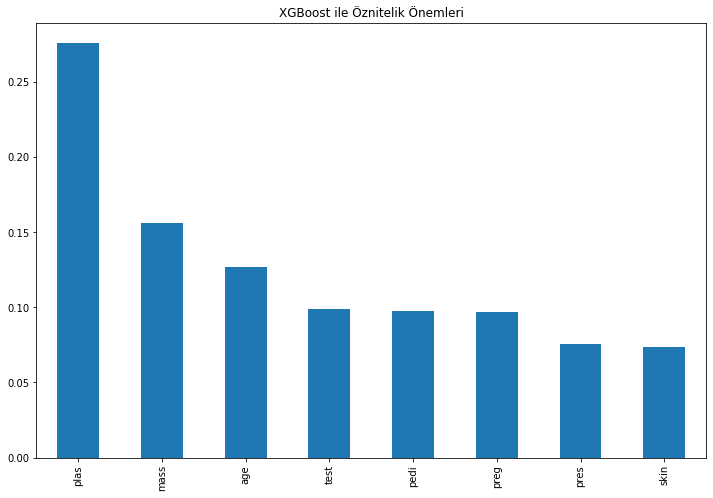

In [49]:
imp_feat_rf = pandas.Series(xgb.feature_importances_, index = names[0:8]).sort_values(ascending = False)
imp_feat_rf.plot(kind = "bar", title = "XGBoost ile Öznitelik Önemleri", figsize = (12,8))
plt.ylabel("Öznitelik Önem Derecesi")
plt.subplots_adjust(bottom = 0.25)
plt.show()

In [53]:
# 8- RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, max_depth = 8, min_samples_leaf = 5)
model.fit(x_train, y_train)

pred = model.predict(x_test)
pred1 = model.predict(x_train)

print("Test Verisi için Doğruluk Oranı  : ", accuracy_score(pred, y_test))
print("\n")
print("Eğitim Verisi için Doğruluk Oranı: ", accuracy_score(pred1, y_train))



Test Verisi için Doğruluk Oranı  :  0.7619047619047619


Eğitim Verisi için Doğruluk Oranı:  0.8845437616387337


TypeError: 'str' object is not callable

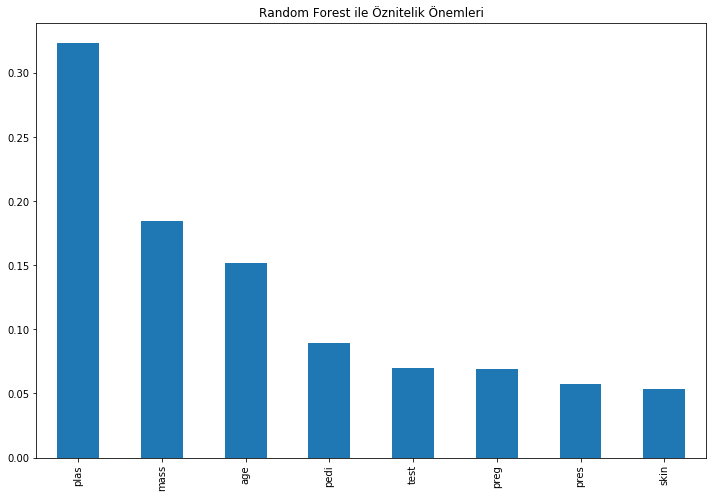

In [54]:
imp_feat_rf = pandas.Series(model.feature_importances_, index = names[0:8]).sort_values(ascending = False)
imp_feat_rf.plot(kind = "bar", title = "Random Forest ile Öznitelik Önemleri", figsize = (12,8))
plt.ylabel("Öznitelik Önem Derecesi")
plt.subplots_adjust(bottom = 0.25)
plt.show()